In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Linear Regression Review

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
x_mean = 70
x_sd = 10
y_mean = 50
y_sd = 12
r = 0.75

In [3]:
midterm_score = 90
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

68.0

In [4]:
midterm_score = 60
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

41.0

In [5]:
# y = a * x + b
a = r * (y_sd / x_sd)
b = y_mean - a * x_mean

In [6]:
a * 90 + b

68.0

In [7]:
a * 60 + b

41.0

## Linear Regression Example

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [8]:
ml_and_rs_app = Table.read_table('ml_and_rs_app.csv')
ml_and_rs_app = ml_and_rs_app.move_to_start('Periods')
ml_and_rs_app.show(3)

Periods,Characters
189,21759
188,22148
231,20558


In [9]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

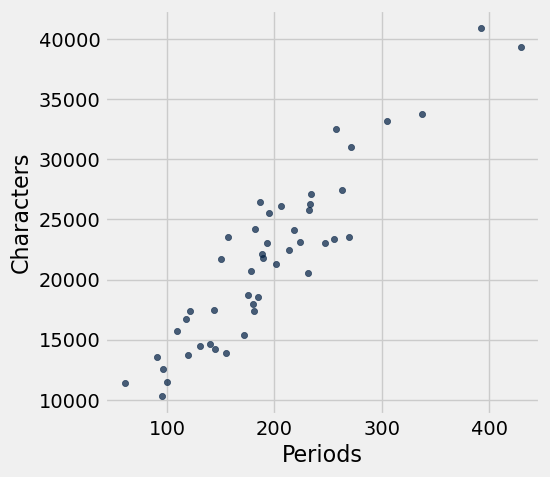

In [10]:
ml_and_rs_app.scatter(0, 1)

In [11]:
correlation(ml_and_rs_app, 0 , 1)

0.92295768958548163

In [12]:
a = slope(ml_and_rs_app, 0 , 1)
b = intercept(ml_and_rs_app, 0 , 1)
a * ml_and_rs_app.column(0) + b

array([ 21183.59679439,  21096.61895313,  24836.66612724,  21705.46384194,
        26924.13431744,  16921.68257274,  16138.88200141,  23358.04282585,
        34056.31730062,  20835.68542936,  21531.50815943,  42058.27869638,
        19965.90701678,  20400.79622307,  20487.77406433,  19704.973493  ,
        18226.35019161,  17269.59393777,  15269.10358883,  17356.57177903,
        28141.82409506,  15182.12574757,  26228.31158737,  20574.75190559,
        12659.76835108,  17791.46098532,  14225.36949373,  28315.77977757,
        25010.62180976,  23705.95419088,  20226.84054055,  24227.82123843,
        24923.6439685 ,  27098.08999996,  22227.33088949,  13442.5689224 ,
        18400.30587413,  22662.22009578,  27619.95704751,  10050.43311333,
        21009.64111188,  15008.17006505,  31273.02638036,  13007.67971611,
        13094.65755737,  25097.59965102,  38840.09856983])

In [13]:
def linear_fit(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

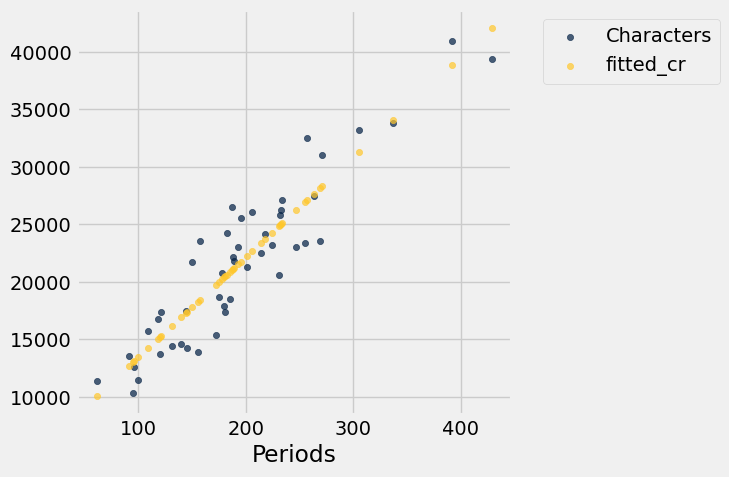

In [14]:
ml_fitted = ml_and_rs_app.with_column('fitted_cr', linear_fit(ml_and_rs_app, 0 , 1))
ml_fitted.scatter(0)

### Squared Error

In [15]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def ml_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'characters per period')
    print('Intercept:', np.round(intercept), 'characters')
    ml_and_rs_app.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     50 characters per period
Intercept: 10000 characters


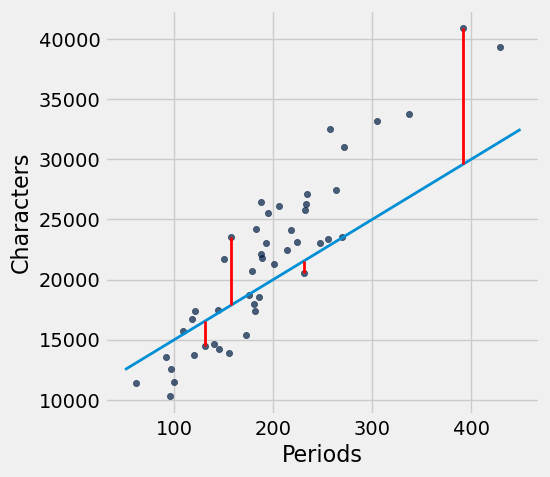

In [16]:
ml_errors(50, 10000)

Slope:     -50 characters per period
Intercept: 20000 characters


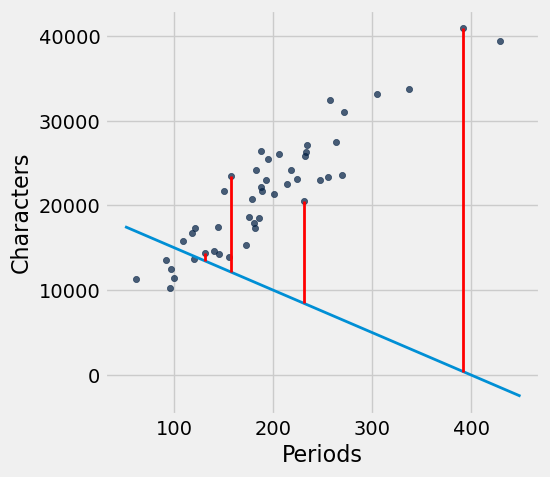

In [17]:
ml_errors(-50, 20000)

In [18]:
def ml_rmse(slope, intercept):
    ml_errors(slope, intercept)
    x = ml_and_rs_app.column('Periods')
    y = ml_and_rs_app.column('Characters')
    predicted = slope * x + intercept
    mse = np.mean((y - predicted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Slope:     50 characters per period
Intercept: 10000 characters
Root mean squared error: 4322.16783177


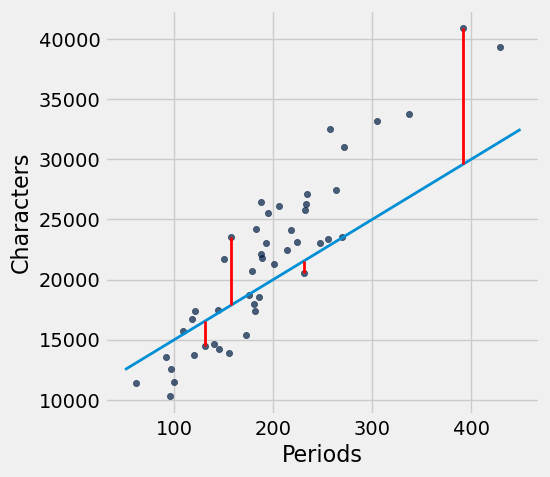

In [19]:
ml_rmse(50, 10000)

Slope:     -50 characters per period
Intercept: 20000 characters
Root mean squared error: 15556.9589915


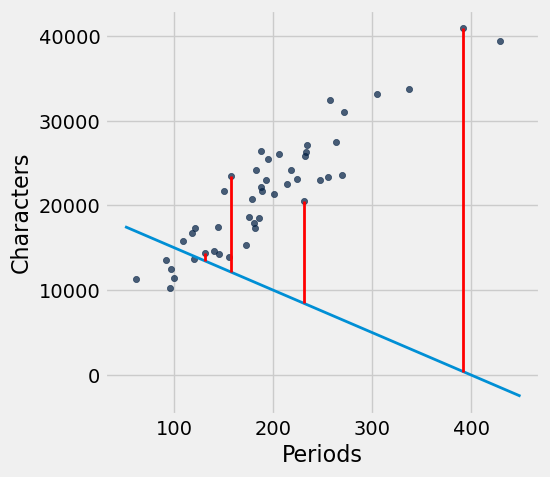

In [20]:
ml_rmse(-50, 20000)

Slope:     90 characters per period
Intercept: 4000 characters
Root mean squared error: 2715.53910638


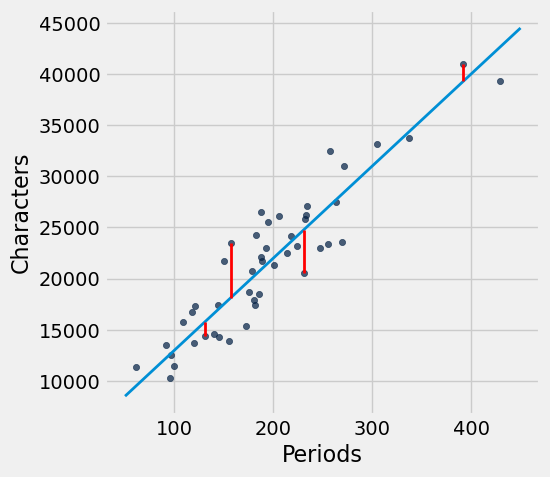

In [21]:
ml_rmse(90, 4000)

Slope:     87.0 characters per period
Intercept: 4745.0 characters
Root mean squared error: 2701.69078531


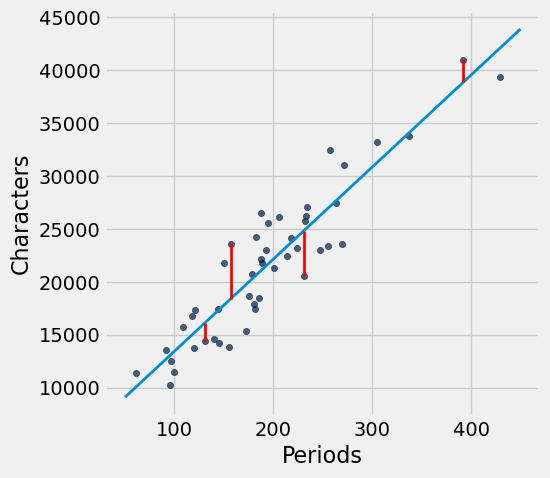

In [22]:
ml_rmse(slope(ml_and_rs_app, 0 , 1), intercept(ml_and_rs_app, 0 , 1))

## Least Squares

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [23]:
def f(x):
    return (x - 3) ** 2 + 1

In [24]:
[f(1), f(2), f(3), f(4), f(5)]

[5, 2, 1, 2, 5]

In [25]:
minimize(f)

2.999999999968361

In [26]:
f(minimize(f))

1.0

In [27]:
f(3)

1

In [28]:
f(3.1)

1.01

In [29]:
f(2.9)

1.01

In [30]:
def ml_mse(any_slope, any_intercept):
    x = ml_and_rs_app.column(0)
    y = ml_and_rs_app.column(1)
    predicted = any_slope * x + any_intercept
    return np.mean((y - predicted) ** 2)

Slope:     50 characters per period
Intercept: 10000 characters
Root mean squared error: 4322.16783177


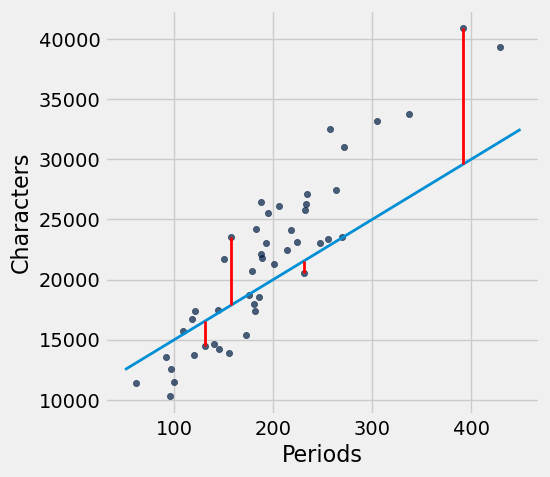

In [31]:
ml_rmse(50, 10000)

In [33]:
ml_mse(50, 10000)**0.5

4322.1678317665373

In [34]:
minimize(ml_mse)

array([   86.97784117,  4744.78484535])

In [35]:
slope(ml_and_rs_app, 0 , 1)

86.977841258298213

In [36]:
intercept(ml_and_rs_app, 0 , 1)

4744.7847965749279